1. Businesse Understanding
-> Prever com base nos dados quais passageiros tem maior chance de sobreviver.
-> Criar um modelo que entender quais fatores aumentam sua probabilidade de sobrevivência.

2. Data Understading
-> Coleta de dados brutos.
-> Descrição das variáveis (tipos, formatos, distribuições).
-> Identificação de problemas (valores faltantes, outliers).
-> Verificar se os dados são suficientes para atender aos objetivos do projeto.
-> Criar relatórios ou gráficos exploratórios iniciais.

3. Data preparation
-> Seleção de variáveis relevantes.
-> Tratamento de dados faltantes ou inconsistentes.
-> Transformações (encoding de variáveis categóricas).
-> Criação de novas variáveis (feature engineering).

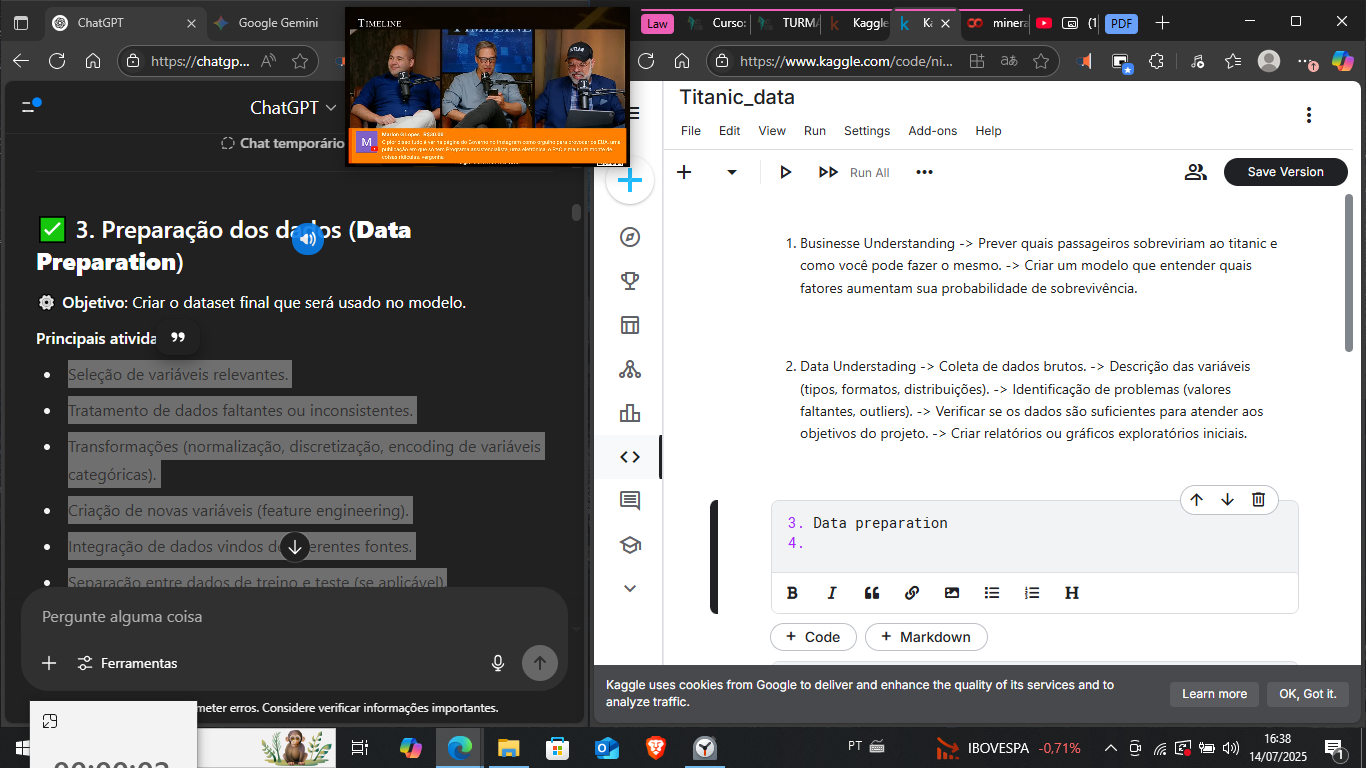

4. Modeling
-> Escolher algoritmos 
-> Ajustar os parâmetros dos modelos (tuning).
-> Treinar os modelos com dados preparados.
-> Avaliar o desempenho inicial (usando métricas como accuracy, ROC AUC, RMSE, etc.).


5. Evaluation
-> Verificar se o modelo responde à pergunta de negócio inicial.
-> Avaliar métricas de performance em dados de teste ou validação.
-> Revisar se existem riscos ou limitações (por exemplo: viés, variáveis sensíveis).
-> Validar com especialistas de negócio.

In [1]:
#Fazendo o Download dos dados e verificando o conteúdo

import pandas as pd

dados = pd.read_csv("/kaggle/input/titanicdataset-traincsv/train.csv")

dados.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
#Verificando algumas informaçoes sobre o dataset
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [3]:
#Fazendo a descrição dos dados numéricos do dataset
dados.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


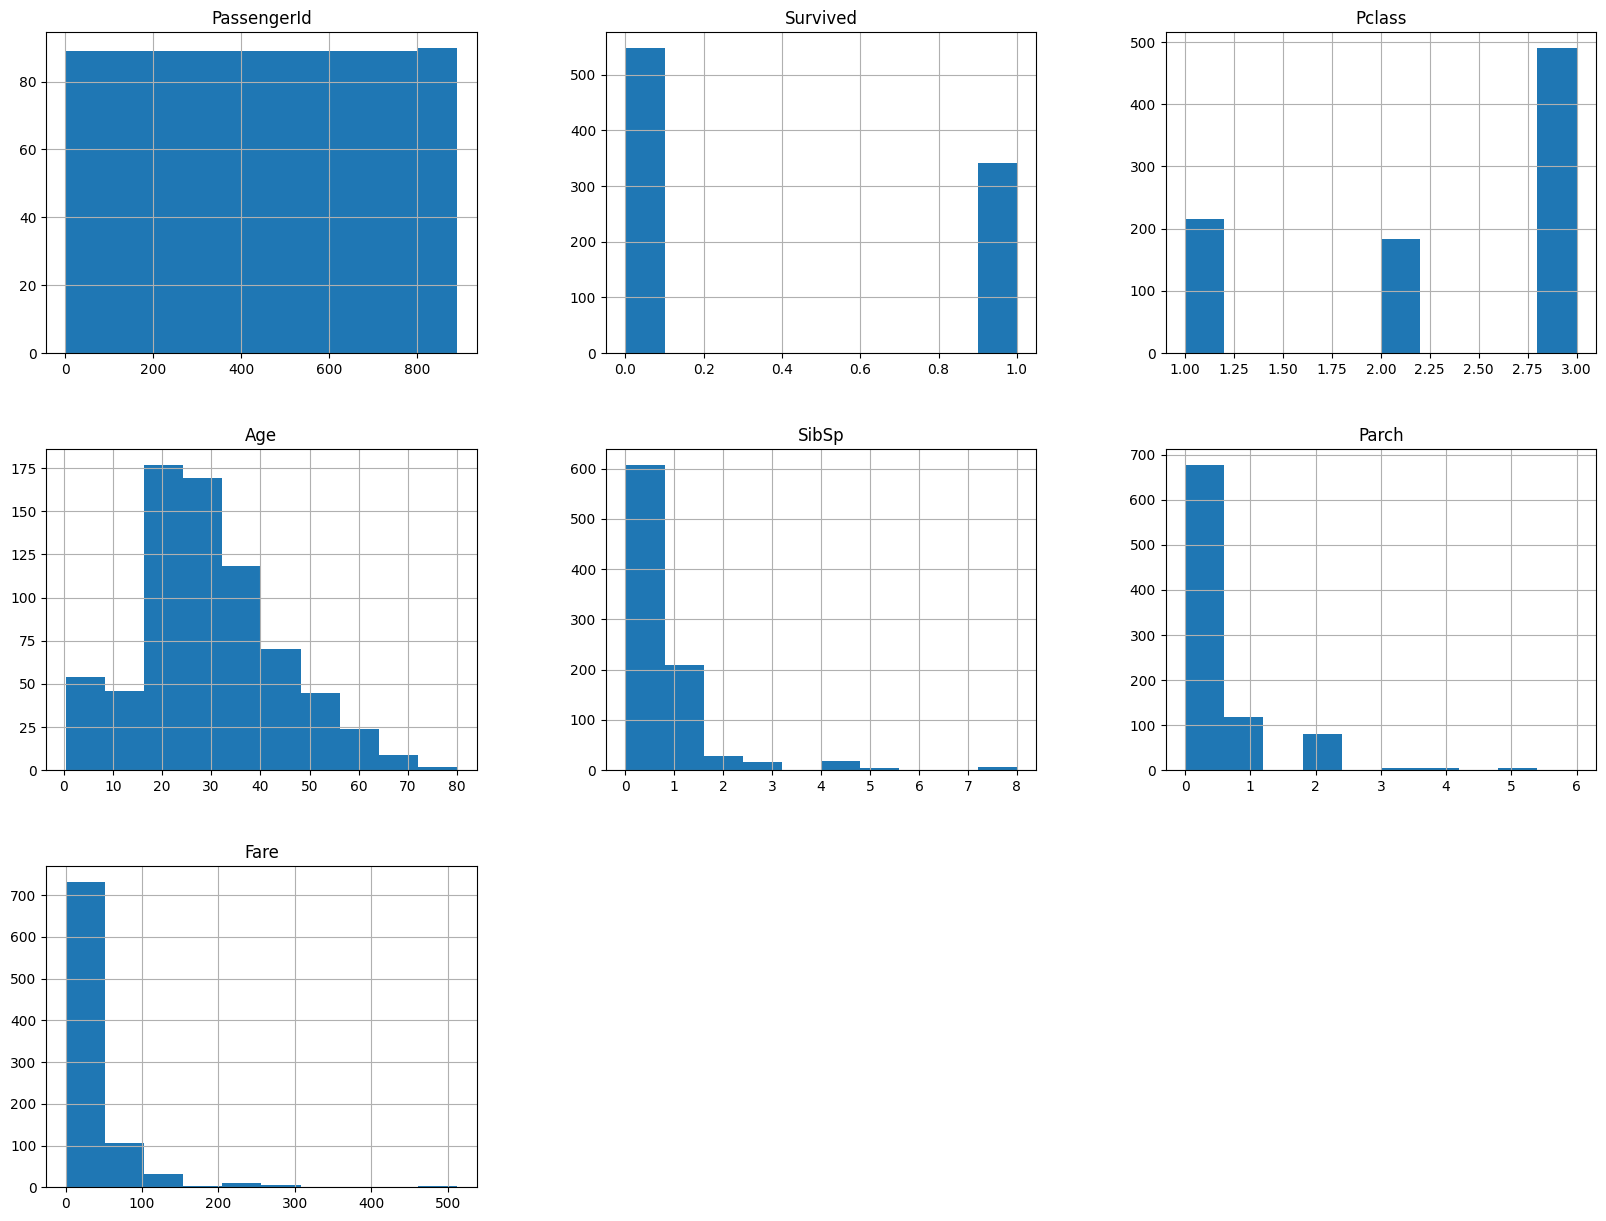

In [4]:
#Vizualizando de forma gráfica algumas variaveis numericas
import matplotlib.pyplot as plt
dados.hist(bins=10,figsize=(20,15))
plt.show()

In [5]:
#Usando o coeficiente de Pearson para medir a correlação entre os dados

colunas_numericas = ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
corr_matriz = dados[colunas_numericas].corr()
print(corr_matriz)

          Survived    Pclass       Age     SibSp     Parch      Fare
Survived  1.000000 -0.338481 -0.077221 -0.035322  0.081629  0.257307
Pclass   -0.338481  1.000000 -0.369226  0.083081  0.018443 -0.549500
Age      -0.077221 -0.369226  1.000000 -0.308247 -0.189119  0.096067
SibSp    -0.035322  0.083081 -0.308247  1.000000  0.414838  0.159651
Parch     0.081629  0.018443 -0.189119  0.414838  1.000000  0.216225
Fare      0.257307 -0.549500  0.096067  0.159651  0.216225  1.000000


In [6]:
#Usando a média para preencher os valores faltantes de idades

dados['Age'].fillna(dados['Age'].median(),inplace=True)

/tmp/ipykernel_13/1600512305.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dados['Age'].fillna(dados['Age'].median(),inplace=True)


In [7]:
#Verificando a existencia de valores nulos
print(dados['Sex'].isnull().sum())


0


In [8]:
#Codificando o sexo para valores binarios

dados['Sex'] = dados['Sex'].map({'male':0,'female':1})

print(dados['Sex'])

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    1
889    0
890    0
Name: Sex, Length: 891, dtype: int64


In [9]:
#Tratando os passageiros que não sabemos onde embarcaram e criando uma variavel do tipo Dummie
import pandas as pd
dados['Embarked'].fillna('S',inplace=True)
dados = pd.get_dummies (dados,columns=['Embarked'],drop_first=True)

/tmp/ipykernel_13/1877871833.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dados['Embarked'].fillna('S',inplace=True)


In [10]:
print(dados)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name  Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    0  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.0      1   
2                               Heikkinen, Miss. Laina    1  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  35.0      1   
4                             Allen, Mr. William Henry    0  35.0      0   
..                                                 ...  ...   ...    ...   
886        

In [11]:
#Selecionando os campos mais relevantes

features = ['Pclass', 'Sex', 'Age', 'Fare', 'Embarked_Q', 'Embarked_S']

X = dados[features]
y = dados['Survived']



In [12]:
#Fazendo a particão dos dados em treino e teste.
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier


X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
model = RandomForestClassifier(random_state=42)
model.fit(X_train,y_train)




RandomForestClassifier(random_state=42)

In [13]:
#testando o nosso modelo
y_prev = model.predict(X_test)

In [14]:
#Usando alguma metricas para ver a acuracia do modelo

from sklearn.metrics import accuracy_score,confusion_matrix

print("Acuracia: ", accuracy_score(y_test,y_prev))

print("Matriz de confusão: ", confusion_matrix(y_test,y_prev))

Acuracia:  0.7932960893854749
Matriz de confusão:  [[86 19]
 [18 56]]
